BHARAT INTERN

MACHINE LEARNING




TASK 2 : WINE QUALITY INTERN

In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
# Load the dataset

data = pd.read_csv('wine_data.csv')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [6]:
#PRINTING THE DATA INFO
data.info


<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075

In [7]:
#describing the dataset

data.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [8]:
#Removing the duplicates 

data=data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
# check the empty data 

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [10]:
#define the shape ( number of rows and column )

data.shape

(1143, 13)

In [11]:
# print the data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


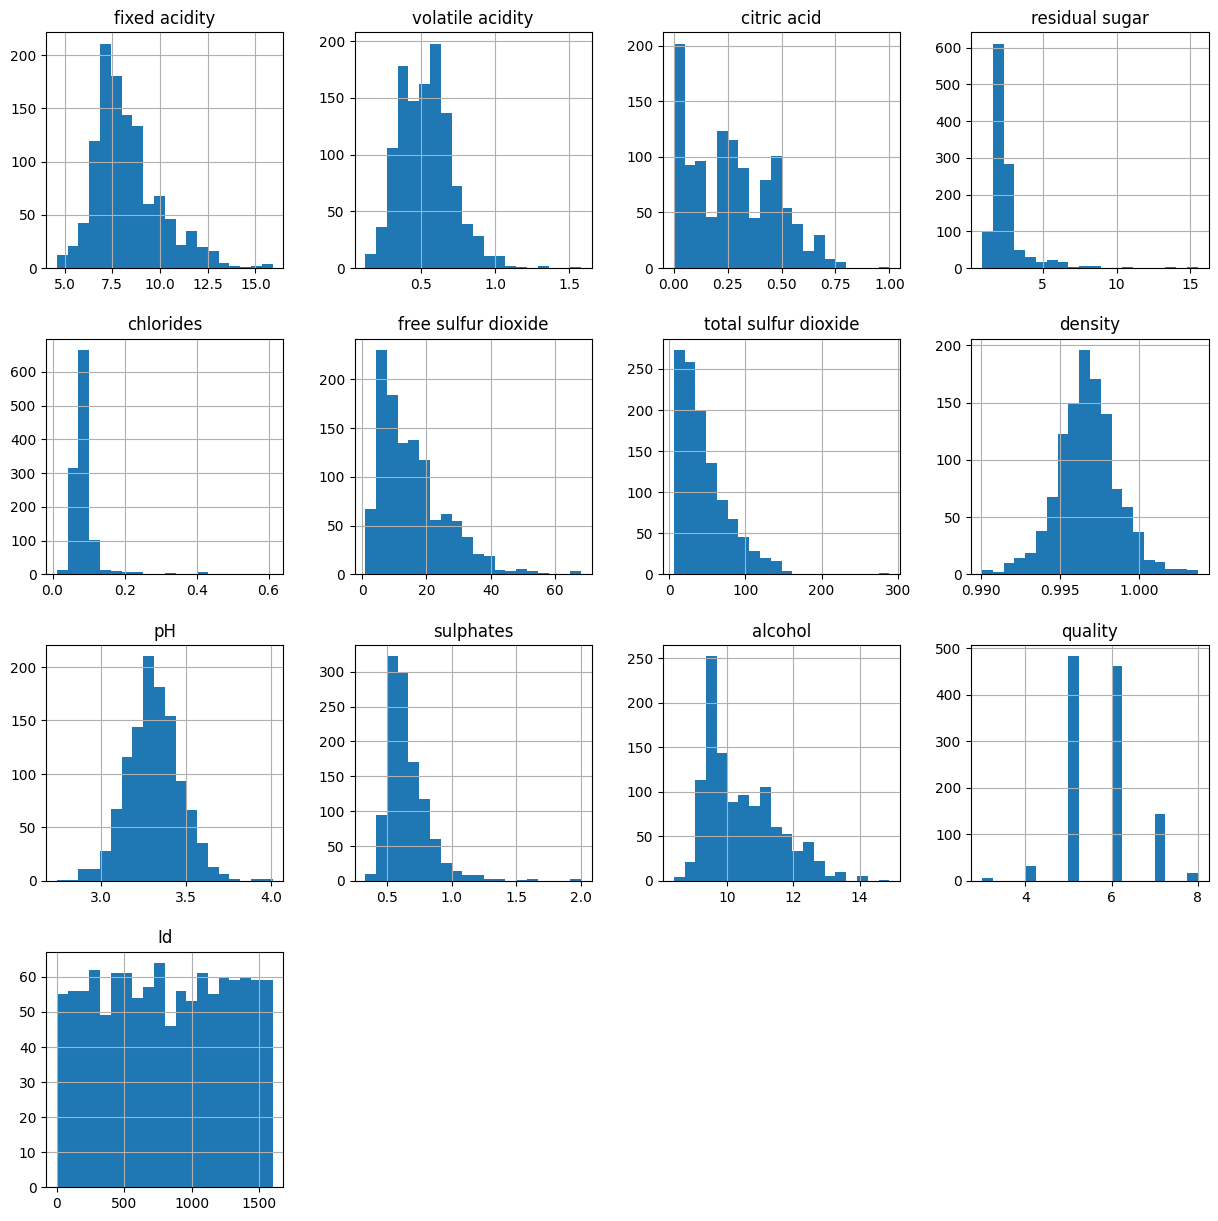

In [12]:
#histogram graph

data.hist(bins=20,figsize=(15,15))
plt.show()

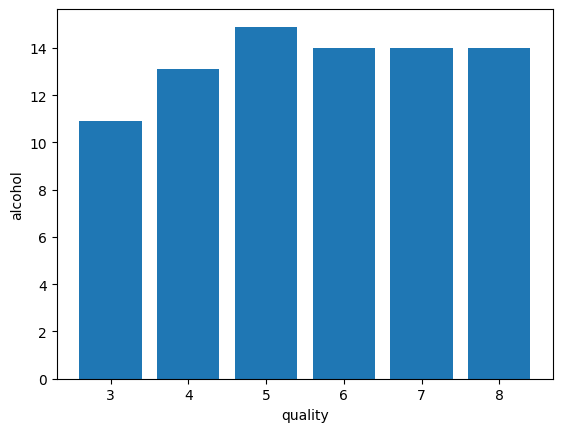

In [13]:
#Bar graph

plt.bar(data['quality'] ,data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

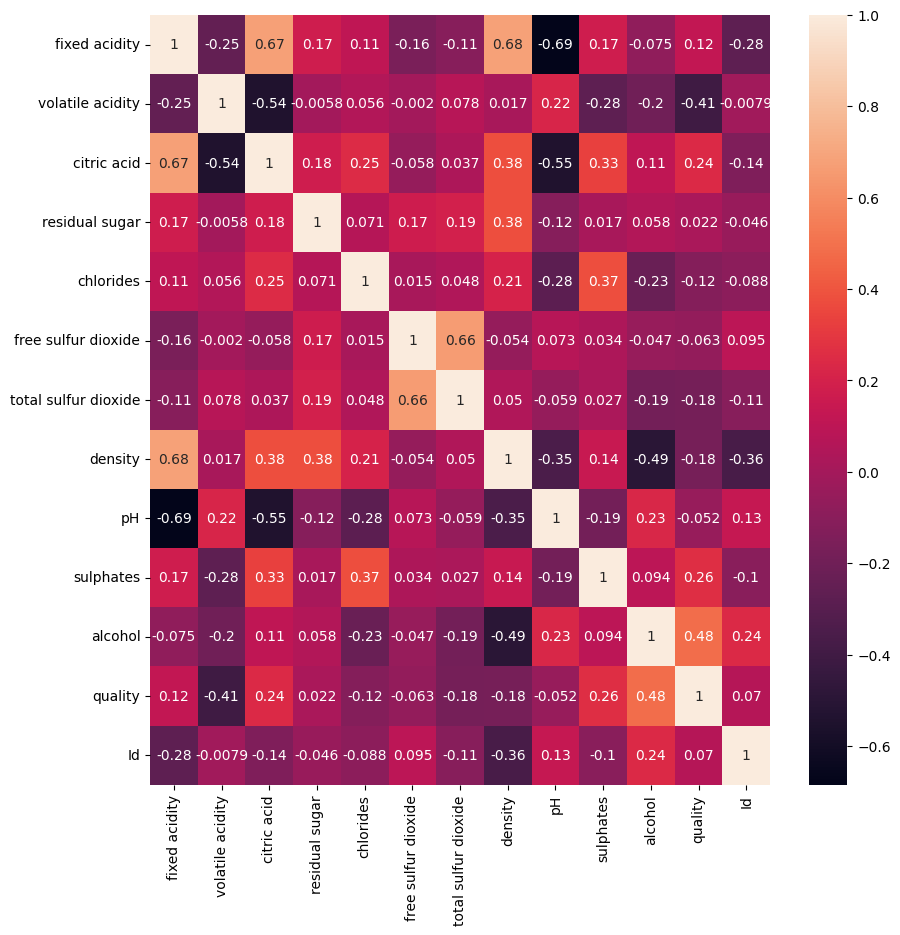

In [14]:
#heatmap graph

plt.figure(figsize=(10,10))
sb.heatmap(data.corr() , annot=True , cbar=True)
plt.show()

In [15]:
# Prepare the data

#feature
x = data.drop('quality', axis=1)  

# Target
y = data['quality']  

print(x)
print(" target data ", y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [16]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


In [17]:
# Standardize features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
# Create and train the random forest classifier

model = RandomForestClassifier(random_state=50)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=50)

In [25]:
# Make predictions on the test set

y_pred = model.predict(x_test_scaled)
print(y_pred)
print(y_test)

[5 6 5 6 5 5 5 5 6 5 6 5 6 5 5 5 6 5 5 5 6 5 5 5 6 5 6 5 5 6 5 6 7 5 6 6 5
 5 6 5 5 5 6 6 5 6 6 6 6 5 5 6 6 6 5 6 5 5 6 6 6 6 5 6 6 6 6 6 6 6 5 5 5 7
 5 6 5 5 7 6 6 6 5 5 6 6 6 6 6 5 6 5 6 5 6 5 6 6 5 6 5 6 5 6 5 6 6 5 6 6 5
 5 5 5 5 6 5 6 5 5 6 6 5 5 5 5 6 5 6 5 6 5 6 5 5 6 5 6 6 6 7 5 5 7 7 5 5 6
 6 5 5 5 6 6 6 5 5 5 5 6 6 7 5 5 5 6 5 8 5 5 6 6 5 5 5 6 5 6 5 5 6 5 7 7 5
 7 6 6 5 5 5 5 6 6 6 5 6 6 5 6 5 6 6 6 5 6 6 6 6 5 5 6 6 6 5 5 5 6 5 5 6 5
 5 5 5 6 6 5 6 5 6 6 6 6 5 6 7 5 6 7 5 5 5 5 6 6 6 5 5 6 6 6 6 6 5 5 6 5 5
 6 5 6 5 7 6 6 6 5 6 6 6 6 6 6 6 5 5 5 5 6 5 6 5 5 5 6 5 6 5 6 7 6 5 6 5 6
 7 5 6 5 5 7 5 6 7 5 5 6 6 6 5 6 6 6 5 6 5 6 5 5 5 5 5 6 5 6 5 7 5 6 6 7 7
 6 6 7 5 5 6 5 6 6 6]
1097    6
1136    6
93      5
494     6
922     3
       ..
766     6
1063    5
898     6
280     6
642     6
Name: quality, Length: 343, dtype: int64


In [26]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


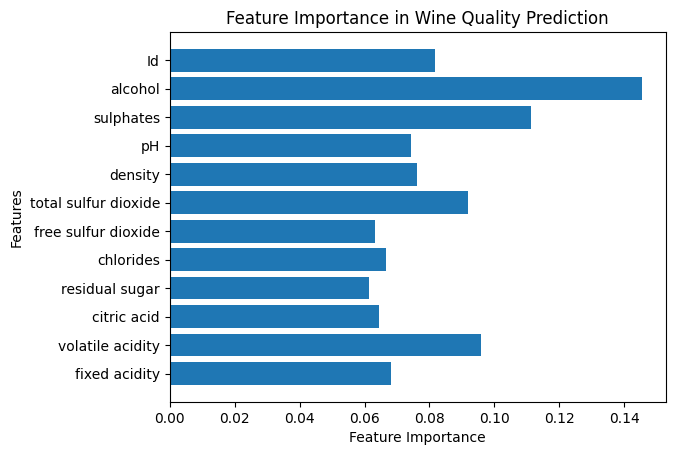

In [27]:
# Visualize feature importances

importances = model.feature_importances_
plt.barh(x.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Wine Quality Prediction')
plt.show()

In [28]:
# classification report

from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred , zero_division=1)
print(report)

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00        16
           5       0.72      0.80      0.76       147
           6       0.54      0.73      0.62       118
           7       0.86      0.31      0.46        58
           8       0.00      0.00      1.00         2

    accuracy                           0.64       343
   macro avg       0.69      0.31      0.47       343
weighted avg       0.69      0.64      0.62       343

